In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
wbb2324 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2023_24.csv')
wbb2223 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2022_23.csv')
wbb2122 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2021_22.csv')
wbb2021 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2020_21.csv')
wbb2324.head()

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,secondary_position,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean
0,2,Abilene Christian,9798.0,Aspen Thornton,Junior,Hot Springs,Ark,Lake Hamilton HS,Ouachita Baptist,"5'6""",...,NaN,GUARD,Junior,0.0,Lake Hamilton HS,"HOT SPRINGS, ARK",AR,USA,2.0,Ouachita Baptist
1,2,Abilene Christian,9800.0,Payton Hull,Freshman,Peaster,Texas,Peaster HS,NaN,"5'11""",...,NaN,GUARD,Freshman,0.0,Peaster HS,"PEASTER, TEXAS",TX,USA,NaN,NaN
2,2,Abilene Christian,9801.0,Addison Martin,Redshirt Sophomore,Shreveport,Louisiana,Captain Shreve HS,NaN,"6'1""",...,NaN,FORWARD,Sophomore,1.0,Captain Shreve HS,"SHREVEPORT, LA",LA,USA,NaN,NaN
3,2,Abilene Christian,9802.0,Zoe Jackson,Junior,McKinney,Texas,Allen HS,Butler,"5'8""",...,NaN,GUARD,Junior,0.0,Allen HS,"MCKINNEY, TEXAS",TX,USA,6.0,Butler
4,2,Abilene Christian,9803.0,Meredith Mayes,Freshman,Bixby,Okla,Bixby HS,NaN,"6'2""",...,NaN,CENTER,Freshman,0.0,Bixby HS,"BIXBY, OKLA",OK,USA,NaN,NaN


In [3]:
wbb2324.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13907 entries, 0 to 13906
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ncaa_id                13907 non-null  int64  
 1   team                   13907 non-null  object 
 2   player_id              13824 non-null  float64
 3   name                   13907 non-null  object 
 4   year                   13907 non-null  object 
 5   hometown               13906 non-null  object 
 6   homestate              13870 non-null  object 
 7   high_school            13395 non-null  object 
 8   previous_school        2397 non-null   object 
 9   height_clean           13731 non-null  object 
 10  position               13763 non-null  object 
 11  jersey                 13803 non-null  object 
 12  url                    13907 non-null  object 
 13  season                 13905 non-null  object 
 14  team_state             13891 non-null  object 
 15  co

In [4]:
wbb2324['conference'].value_counts()

conference
NSIC               229
PSAC               220
NACC               206
Sun Belt           206
Atlantic 10        204
                  ... 
CUNYAC              43
MASCAC              35
DII Independent     28
DI Independent      25
Heartland           18
Name: count, Length: 103, dtype: int64

In [5]:
wbb2324['height_clean'].value_counts()

height_clean
5'8"      1334
5'10"     1319
5'9"      1288
5'7"      1186
6'0"      1089
          ... 
5'-7"        1
4'8"         1
5' 3"        1
5' 2''       1
6'-0"        1
Name: count, Length: 118, dtype: int64

In [6]:
wbb2324['height'] = wbb2324.height_clean.str.replace(' ', '').str.replace('-', '')
wbb2324['height'].value_counts()

height
5'8"     1342
5'10"    1331
5'9"     1293
5'7"     1194
6'0"     1107
         ... 
5’6         1
5’8         1
5’9         1
5’3         1
6′2″        1
Name: count, Length: 96, dtype: int64

In [7]:
wbb2324['height'] = wbb2324.height.str.replace("`", "ft").str.replace("'", "ft").str.replace('"', 'inches')
wbb2324.height.value_counts()

height
5ft8inches     1342
5ft10inches    1331
5ft9inches     1293
5ft7inches     1194
6ft0inches     1107
               ... 
5’6               1
5’8               1
5’9               1
5’3               1
6′2″              1
Name: count, Length: 96, dtype: int64

In [8]:
wbb2324['height'] = wbb2324['height'].fillna("0")

In [9]:
wbb2324.loc[~wbb2324.height.str.contains('inches')]

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean,height
28,5,Akron,0.0,Kaia Woods,Jr.,Tiffin,Ohio,Royal Crown Academy,Washington State,5' 3'',...,GUARD,Junior,0.0,Royal Crown Academy,"TIFFIN, OHIO",OH,USA,1.0,Washington State,5ft3ftft
29,5,Akron,0.0,Alexis Stewart,Sr.,Hamilton,Ontario,St. Thomas More,NaN,5' 10'',...,GUARD,Senior,0.0,St. Thomas More,"HAMILTON, ONTARIO",NaN,CANADA,NaN,NaN,5ft10ftft
30,5,Akron,0.0,Dacia Lewandowski,Fr.,Pittsburgh,Pennsylvania,North Catholic,NaN,5' 11'',...,GUARD,Freshman,0.0,North Catholic,"PITTSBURGH, PA",PA,USA,NaN,NaN,5ft11ftft
31,5,Akron,0.0,Liisa Taponen,So.,Tampere,Finland,Mäkelänrinteen Upper Secondary School,Illinois,6' 5'',...,CENTER,Sophomore,0.0,Mäkelänrinteen Upper Secondary School,"TAMPERE, FINLAND",NaN,FINLAND,6.0,Illinois,6ft5ftft
32,5,Akron,0.0,Morgan Haney,R-Sr.,Piqua,Ohio,Miami East,Albany,5' 8'',...,GUARD,Senior,1.0,Miami East,"PIQUA, OHIO",OH,USA,3.0,Albany,5ft8ftft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13885,30225,SUNY Delhi,0.0,Jayda Allen,Sr.,Brooklyn,New York,South Shore,Sullivan CC,5'11,...,FORWARD,Senior,0.0,South Shore,"BROOKLYN, NY",NY,USA,1.0,Sullivan CC,5ft11
13886,30225,SUNY Delhi,0.0,Kayleigh Allen,Fr.,Hermon,New York,Edwards-Knox Central,NaN,5'4,...,GUARD,Freshman,0.0,Edwards-Knox Central,"HERMON, NY",NY,USA,NaN,NaN,5ft4
13887,30225,SUNY Delhi,0.0,Jennifer Roche Jimenez,Jr.,Bronx,New York,AECI Charter,NaN,5'1,...,GUARD,Junior,0.0,AECI Charter,"BRONX, NY",NY,USA,NaN,NaN,5ft1
13888,30225,SUNY Delhi,0.0,Xavia Evener,Fr.,Auburn,New York,Union Springs,NaN,5'8,...,FORWARD,Freshman,0.0,Union Springs,"AUBURN, NY",NY,USA,NaN,NaN,5ft8


In [10]:
bad_char_list = []
for val in wbb2324.height:
    for char in val:
        if char.isnumeric() == False:
            if char not in ['f', 'e', 't', 'i', 'n', 'c', 'h', 's']:
                bad_char_list. append (char)

In [11]:
bad_chars = list(set(bad_char_list))
bad_chars

['a', 'G', 'u', '’', '″', 'd', 'r', '′']

In [12]:
wbb2324.loc[wbb2324.height.str.contains('G')]

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean,height
12602,24400,Concordia (TX),6725.0,Haven Haymes,Freshman,Sparta,Missouri,Ozark HS,NaN,Guard,...,NaN,Freshman,0.0,Ozark HS,"SPARTA, MISSOURI",MO,USA,NaN,NaN,Guard
12603,24400,Concordia (TX),6722.0,Olivia Drummer,Freshman,Tomball,Texas,Tomball Memorial HS,NaN,Guard,...,NaN,Freshman,0.0,Tomball Memorial HS,"TOMBALL, TEXAS",TX,USA,NaN,NaN,Guard


In [13]:
wbb2324.loc[12602,'height_clean'] = '6ft0inches'
wbb2324.loc[12603,'height_clean'] = '0'

In [14]:
wbb2324.loc[wbb2324.height.str.contains('′')]
wbb2324['height'] = wbb2324.height.str.replace('′', "ft").str.replace('’', "ft")

In [15]:
wbb2324.loc[wbb2324.height.str.contains('’')]

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean,height


In [16]:
wbb2324.loc[~wbb2324.height.str.contains('ft')]

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean,height
156,16,Albright,8975.0,Shakyla Mayo,First Year,Laureldale,Pennsylvania,Muhlenberg,NaN,NaN,...,GUARD,Freshman,0.0,Muhlenberg,"LAURELDALE, PA",PA,USA,NaN,NaN,0
160,16,Albright,8976.0,Julia Parmelee,First Year,Somerset,New Jersey,Rutgers Prep,NaN,NaN,...,GUARD,Freshman,0.0,Rutgers Prep,"SOMERSET, NJ",NJ,USA,NaN,NaN,0
162,16,Albright,8974.0,Juliana Harris,First Year,North East,Maryland,Tri-State Christian Academy,NaN,NaN,...,FORWARD,Freshman,0.0,Tri-State Christian Academy,"NORTH EAST, MD",MD,USA,NaN,NaN,0
165,16,Albright,8971.0,Kenedy Cooper,First Year,Harrisburg,Pennsylvania,Central Dauphin HS,NaN,NaN,...,GUARD,Freshman,0.0,Central Dauphin HS,"HARRISBURG, PA",PA,USA,NaN,NaN,0
166,16,Albright,8977.0,Gigi Serrano,First Year,Shillington,Pennsylvania,Governor Mifflin,NaN,NaN,...,GUARD/FORWARD,Freshman,0.0,Governor Mifflin,"SHILLINGTON, PA",PA,USA,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13818,30209,Westminster (UT),9638.0,Teuila Nawahine,Sophomore,Highland,Utah,Lone Peak High School,NaN,NaN,...,GUARD,Sophomore,0.0,Lone Peak High School,"HIGHLAND, UT",UT,USA,NaN,NaN,0
13819,30209,Westminster (UT),9636.0,Elizabeth Means,Senior,Folsom,California,Folsom High School,Seattle Pacific University,NaN,...,FORWARD,Senior,0.0,Folsom High School,"FOLSOM, CA",CA,USA,1.0,Seattle Pacific,0
13820,30209,Westminster (UT),9831.0,Kayla Javillo,Junior,Las Vegas,Nevada,NaN,NaN,NaN,...,NaN,Junior,0.0,NaN,"LAS VEGAS, NV",NV,USA,NaN,NaN,0
13822,30209,Westminster (UT),9637.0,Alexis Monson,Sophomore,Filer,Idaho,Filer High School,NaN,NaN,...,GUARD,Sophomore,0.0,Filer High School,"FILER, ID",ID,USA,NaN,NaN,0


In [17]:
position_count = wbb2324['position_clean'].value_counts().reset_index()
position_count

,position_clean,count
0,GUARD,8282
1,FORWARD,3826
2,GUARD/FORWARD,771
3,CENTER,596
4,FORWARD/CENTER,192
5,WING,37
6,GUARD/CENTER,2


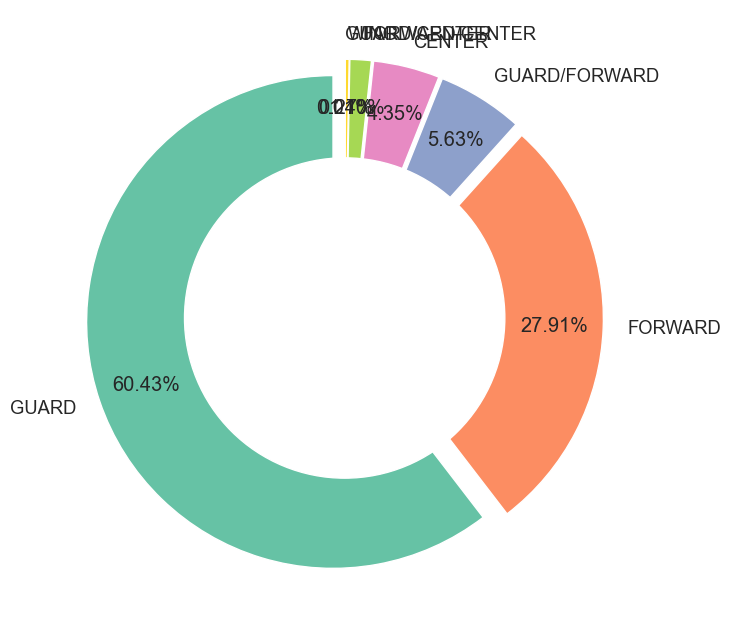

In [18]:
position_clean = position_count['position_clean']
count = position_count['count']

sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))
 
plt.pie(
    x=count, labels=position_clean,
    colors=sns.color_palette('Set2'),
    startangle=90,
    # show percentages
    autopct='%1.2f%%',
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
)
 
### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

In [19]:
combo_sum = position_count.loc[[2, 4, 6], 'count'].sum()
new_row = pd.DataFrame({'position_clean': ['COMBO'], 'count': [combo_sum]})
position_count = pd.concat([position_count, new_row], ignore_index=True)
position_count = position_count.drop([2, 4, 6]).reset_index(drop=True)
position_count = position_count.sort_values('count', ascending = False)

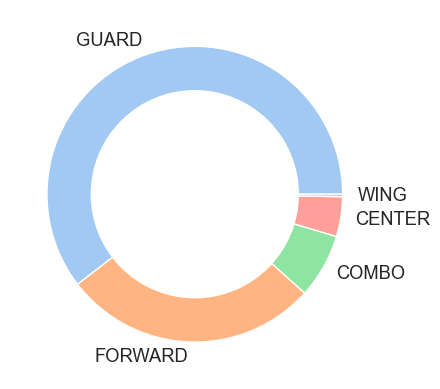

In [20]:
# library
import matplotlib.pyplot as plt

# create data
names = position_count['position_clean']
size = position_count['count']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=sns.color_palette("pastel"),)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

In [21]:
state_count = wbb2324['state_clean'].value_counts().reset_index()
state_count['count'].sum()

12761

In [22]:
state_count['odds'] = 1/(state_count['count']/12761)
state_count

,state_clean,count,odds
0,TX,906,14.084989
1,PA,900,14.178889
2,NY,850,15.012941
3,CA,711,17.947961
4,OH,678,18.821534
5,IL,644,19.815217
6,NJ,530,24.077358
7,MN,479,26.640919
8,WI,450,28.357778
9,VA,415,30.749398


In [23]:
wbb2324[wbb2324['state_clean'] == 'GU']

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean,height
13121,30084,Geneva,4742.0,Mia San Nicolas,Senior,Sinajana,Guam,Academy of Our Lady of Guam,NaN,NaN,...,FORWARD,Senior,0.0,Academy of Our Lady of Guam,"SINAJANA, GUAM",GU,USA,NaN,NaN,0


I think it would be best to filiter down to DI Power 5 conferences. The Power Five conferences in 2023 were the Big 10, Big 12, Atlantic Coast Conference (ACC), and Southeastern Conference (SEC), and Pac-12.

In [25]:
wbb2324['division'].value_counts()

division
III    5224
I      5049
II     3615
Name: count, dtype: int64

In [26]:
power_five2324 = wbb2324[wbb2324['conference'].isin(['ACC','Big Ten', 'Big 12', 'Pac-12', 'SEC'])]
power_five2324.groupby('conference')['team'].nunique()

conference
ACC        15
Big 12     10
Big Ten    14
Pac-12     12
SEC        14
Name: team, dtype: int64

In [27]:
power_five2324['height_clean'].value_counts()

height_clean
6'0"      48
6'2"      47
5'11"     40
6'1"      40
6'4"      39
          ..
6' 4"      1
5' 3"      1
6' 6''     1
5-3        1
6'9"       1
Name: count, Length: 67, dtype: int64

In [28]:
power_five2324['height_clean'] = wbb2324.height_clean.str.replace(' ', '').str.replace('-', '').str.replace("''",'"')
power_five2324['height_clean'].value_counts()

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_14749/1667136034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_five2324['height_clean'] = wbb2324.height_clean.str.replace(' ', '').str.replace('-', '').str.replace("''",'"')


height_clean
6'2"     88
6'0"     86
6'1"     73
6'3"     71
5'11"    61
5'10"    57
5'9"     52
6'4"     48
5'8"     47
5'7"     37
5'6"     26
6'5"     23
62       22
63       18
510      15
59       15
60       14
58       12
6'6"     11
511      11
61       10
57        9
64        9
56        8
6'7"      7
5'5"      6
5'4"      4
66        4
5'3"      3
65        3
54        2
6'8"      2
67        2
53        1
6'9"      1
Name: count, dtype: int64

In [29]:
power_five2324[power_five2324['height'] == '53']

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean,height
1788,147,Clemson,0.0,Nya Valentine,Jr.,Mobile,Ala,McGill-Toolen HS,Shelton State CC,53,...,GUARD,Junior,0.0,McGill-Toolen HS,"MOBILE, ALA",AL,USA,6.0,Shelton State CC,53


In [30]:
power_five2324['height_clean'] = power_five2324.height_clean.str.replace('62', '6\'2"').str.replace('63', '6\'3"').str.replace('510', '5\'10"').str.replace('60', '6\'0"').str.replace('58', '5\'8"').str.replace('511', '5\'11"').str.replace('61', '6\'1"').str.replace('64', '6\'4"').str.replace('57', '5\'7"').str.replace('56', '5\'6"').str.replace('66', '6\'6"').str.replace('65', '6\'5"').str.replace('54', '5\'4"').str.replace('59', '5\'9"').str.replace('67', '6\'7"').str.replace('53', '5\'3"')
power_five_heights = power_five2324['height_clean'].value_counts().reset_index()
power_five_heights.sort_values(by = 'height_clean', ascending = True)

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_14749/1568108759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_five2324['height_clean'] = power_five2324.height_clean.str.replace('62', '6\'2"').str.replace('63', '6\'3"').str.replace('510', '5\'10"').str.replace('60', '6\'0"').str.replace('58', '5\'8"').str.replace('511', '5\'11"').str.replace('61', '6\'1"').str.replace('64', '6\'4"').str.replace('57', '5\'7"').str.replace('56', '5\'6"').str.replace('66', '6\'6"').str.replace('65', '6\'5"').str.replace('54', '5\'4"').str.replace('59', '5\'9"').str.replace('67', '6\'7"').str.replace('53', '5\'3"')


,height_clean,count
5,"5'10""",72
4,"5'11""",72
16,"5'3""",4
15,"5'4""",6
14,"5'5""",6
10,"5'6""",34
9,"5'7""",46
7,"5'8""",59
6,"5'9""",67
1,"6'0""",100


In [31]:
height_order = ['5\'3"','5\'4"','5\'5"','5\'6"','5\'7"','5\'8"','5\'9"','5\'10"','5\'11"','6\'0"','6\'1"','6\'2"', '6\'3"','6\'4"','6\'5"','6\'6"','6\'7"','6\'8"','6\'9"']
#Create a categorical column with the desired order
power_five_heights['height_clean'] = pd.Categorical(power_five_heights['height_clean'], categories=height_order, ordered = True)
power_five_heights = power_five_heights.sort_values(by = 'height_clean')

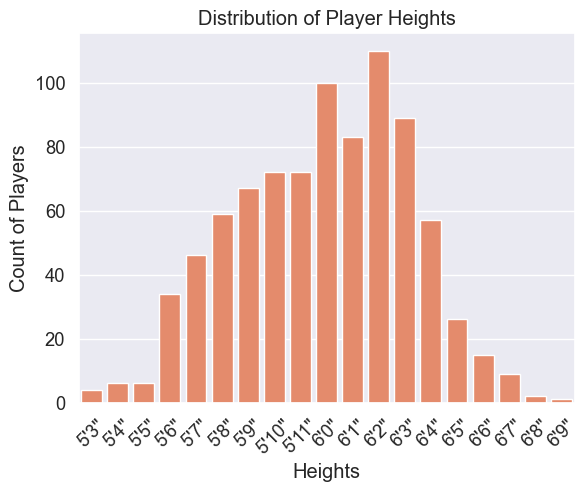

In [85]:
sns.barplot(data=power_five_heights, x="height_clean", y="count", color = '#F88158')
plt.legend([],[], frameon=False)  # This removes the legend
plt.xlabel('Heights') # x-axis name
plt.ylabel('Count of Players') # x-axis name
plt.title('Distribution of Player Heights') # Add a title
plt.xticks(rotation=45)
plt.show() # Display the graph

In [33]:
power_five_heights2 = power_five2324['total_inches'].value_counts().reset_index()
power_five_heights2.sort_values(by= 'total_inches', ascending = True)

,total_inches,count
16,63.0,4
15,64.0,6
14,65.0,6
10,66.0,34
9,67.0,46
7,68.0,59
6,69.0,67
5,70.0,72
4,71.0,72
1,72.0,100


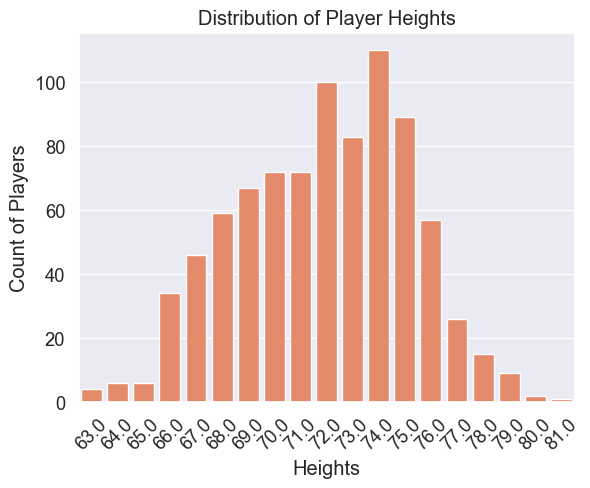

In [34]:
sns.barplot(data=power_five_heights2, x="total_inches", y="count", color = '#F88158' )
plt.legend([],[], frameon=False)  # This removes the legend
plt.xlabel('Heights') # x-axis name
plt.ylabel('Count of Players') # x-axis name
plt.title('Distribution of Player Heights') # Add a title
plt.xticks(rotation=45)
plt.show() # Display the graph

In [35]:
height_by_conference = power_five2324[['conference','total_inches']]
height_by_conference

,conference,total_inches
75,SEC,68.0
76,SEC,77.0
77,SEC,76.0
78,SEC,71.0
79,SEC,68.0
...,...,...
9533,Big Ten,76.0
9534,Big Ten,72.0
9535,Big Ten,74.0
9536,Big Ten,70.0


In [36]:
average_by_conference = power_five2324.groupby('conference')['total_inches'].mean()
average_by_conference

conference
ACC        71.651042
Big 12     71.733813
Big Ten    71.978378
Pac-12     72.206250
SEC        71.824176
Name: total_inches, dtype: float64

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_14749/878195285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='conference', y='total_inches', data=height_by_conference, palette="Set2")


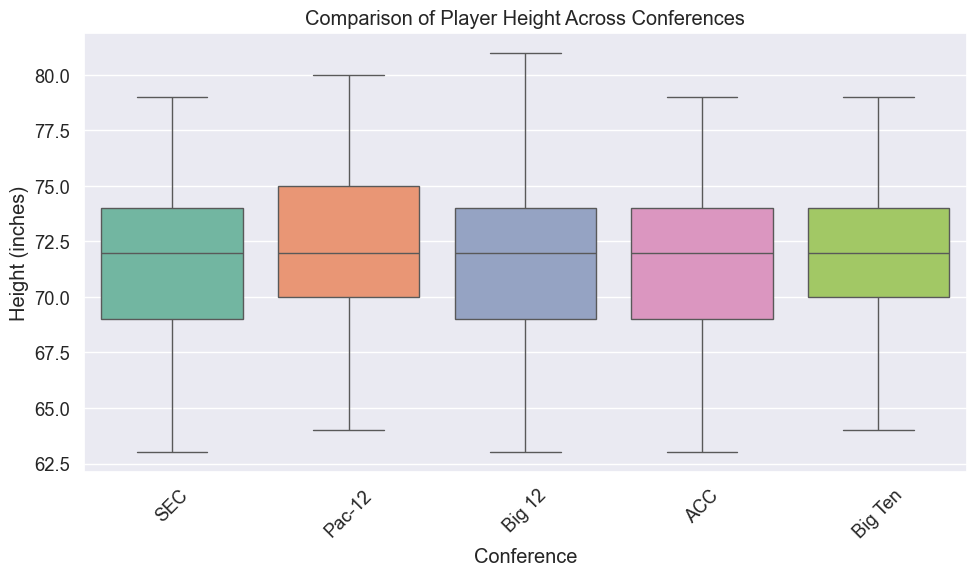

In [37]:
# Create a box plot comparing heights by conference
plt.figure(figsize=(10, 6))
sns.boxplot(x='conference', y='total_inches', data=height_by_conference, palette="Set2")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title('Comparison of Player Height Across Conferences')
plt.xlabel('Conference')
plt.ylabel('Height (inches)')
plt.tight_layout()
plt.show()

In [38]:
wbb2324 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2023_24.csv')
wbb2223 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2022_23.csv')
wbb2122 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2021_22.csv')
wbb2021 = pd.read_csv('../data/womens-college-basketball/wbb_rosters_2020_21.csv')
wbb2324.head()

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school,height_clean,...,secondary_position,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean,count,previous_school_clean
0,2,Abilene Christian,9798.0,Aspen Thornton,Junior,Hot Springs,Ark,Lake Hamilton HS,Ouachita Baptist,"5'6""",...,NaN,GUARD,Junior,0.0,Lake Hamilton HS,"HOT SPRINGS, ARK",AR,USA,2.0,Ouachita Baptist
1,2,Abilene Christian,9800.0,Payton Hull,Freshman,Peaster,Texas,Peaster HS,NaN,"5'11""",...,NaN,GUARD,Freshman,0.0,Peaster HS,"PEASTER, TEXAS",TX,USA,NaN,NaN
2,2,Abilene Christian,9801.0,Addison Martin,Redshirt Sophomore,Shreveport,Louisiana,Captain Shreve HS,NaN,"6'1""",...,NaN,FORWARD,Sophomore,1.0,Captain Shreve HS,"SHREVEPORT, LA",LA,USA,NaN,NaN
3,2,Abilene Christian,9802.0,Zoe Jackson,Junior,McKinney,Texas,Allen HS,Butler,"5'8""",...,NaN,GUARD,Junior,0.0,Allen HS,"MCKINNEY, TEXAS",TX,USA,6.0,Butler
4,2,Abilene Christian,9803.0,Meredith Mayes,Freshman,Bixby,Okla,Bixby HS,NaN,"6'2""",...,NaN,CENTER,Freshman,0.0,Bixby HS,"BIXBY, OKLA",OK,USA,NaN,NaN


In [39]:
wbb2122.head()

,ncaa_id,team,player_id,name,year,hometown,homestate,high_school,previous_school_clean,height_clean,...,division,primary_position,secondary_position,position_clean,year_clean,redshirt,hs_clean,hometown_clean,state_clean,country_clean
0,2,Abilene Christian,8843.0,Kamryn Mraz,Redshirt Junior,Little River,Texas,Academy HS,NaN,"5'7""",...,I,GUARD,NaN,GUARD,Junior,1.0,Academy HS,"LITTLE RIVER, TEXAS",TX,USA
1,2,Abilene Christian,8840.0,Katie Horyna,Sophomore,Liberal,Kan,Liberal HS,NaN,"5'9""",...,I,GUARD,NaN,GUARD,Sophomore,0.0,Liberal HS,"LIBERAL, KAN",KS,USA
2,2,Abilene Christian,8842.0,Taylor Morgan,Sophomore,Fort Worth,Texas,All Saints Episcopal HS,NaN,"5'6""",...,I,GUARD,NaN,GUARD,Sophomore,0.0,All Saints Episcopal HS,"FORT WORTH, TEXAS",TX,USA
3,2,Abilene Christian,8847.0,Alexis Babineaux,Freshman,Houston,Texas,Westfield HS,NaN,"6'2""",...,I,CENTER,NaN,CENTER,Freshman,0.0,Westfield HS,"HOUSTON, TEXAS",TX,USA
4,2,Abilene Christian,8848.0,Addison Martin,Freshman,Shreveport,Louisiana,Captain Shreve HS,NaN,"6'0""",...,I,FORWARD,NaN,FORWARD,Freshman,0.0,Captain Shreve HS,"SHREVEPORT, LA",LA,USA


In [40]:
height_2324 = wbb2324[wbb2324['conference'].isin(['ACC','Big Ten', 'Big 12', 'Pac-12', 'SEC'])][['conference','total_inches']]
height_2223 = wbb2223[wbb2223['conference'].isin(['ACC','Big Ten', 'Big 12', 'Pac-12', 'SEC'])][['conference','total_inches']]
height_2021 = wbb2021[wbb2021['conference'].isin(['ACC','Big Ten', 'Big 12', 'Pac-12', 'SEC'])][['conference','total_inches']]
overall_height = pd.concat([height_2324, height_2223, height_2021], ignore_index=True)

In [41]:
overall_height

,conference,total_inches
0,SEC,68.0
1,SEC,77.0
2,SEC,76.0
3,SEC,71.0
4,SEC,68.0
...,...,...
2588,Big Ten,73.0
2589,Big Ten,71.0
2590,Big Ten,75.0
2591,Big Ten,74.0


/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_14749/403022668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='conference', y='total_inches', data=overall_height, palette="Set2")


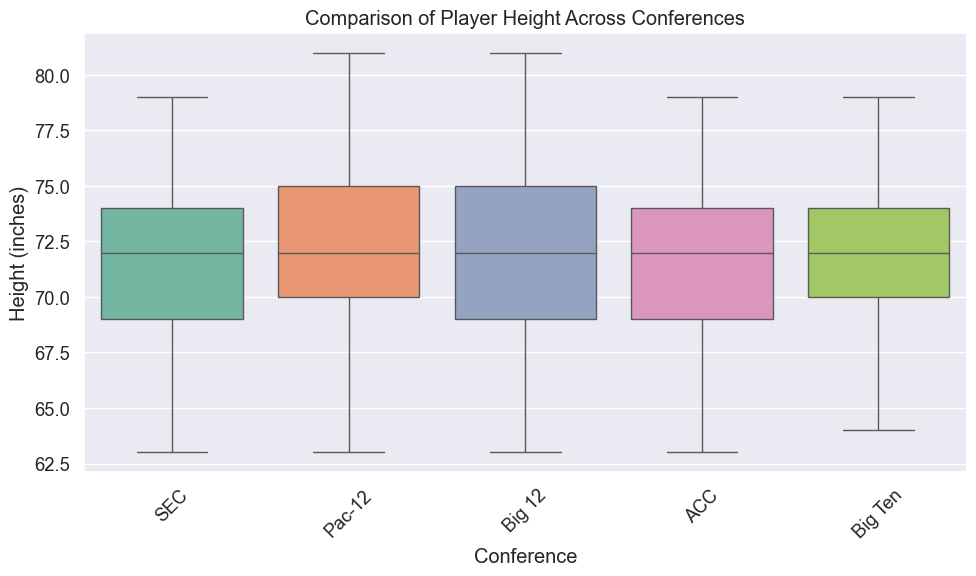

In [42]:
# Create a box plot comparing heights by conference
plt.figure(figsize=(10, 6))
sns.boxplot(x='conference', y='total_inches', data=overall_height, palette="Set2")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title('Comparison of Player Height Across Conferences')
plt.xlabel('Conference')
plt.ylabel('Height (inches)')
plt.tight_layout()
plt.show()